Starting COVID-19 Data Analysis...
Dataset loaded successfully
Data shape: (429435, 67)

First few rows:
  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  .

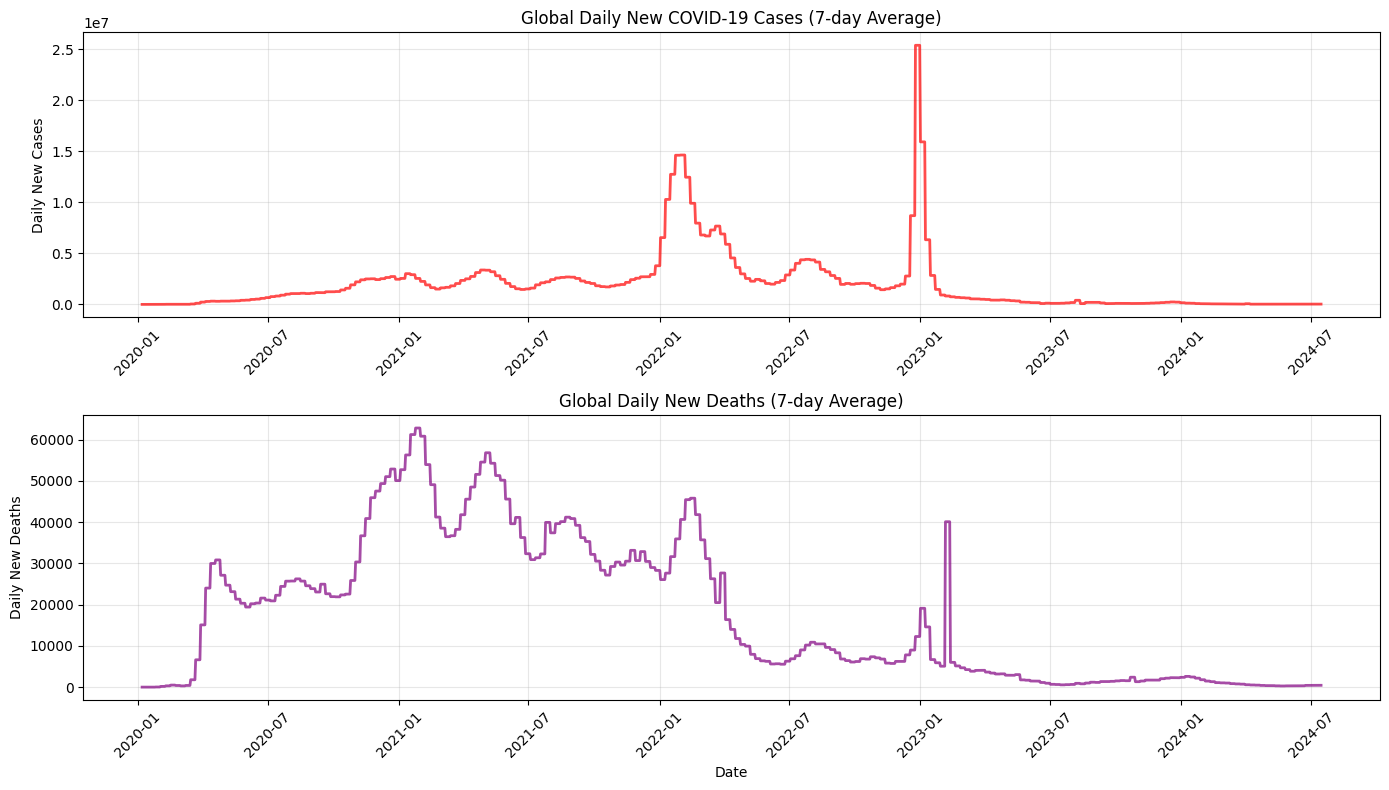

Total global cases: 3,287,411,050
Total global deaths: 29,477,030

Analysis 2: Country Comparison


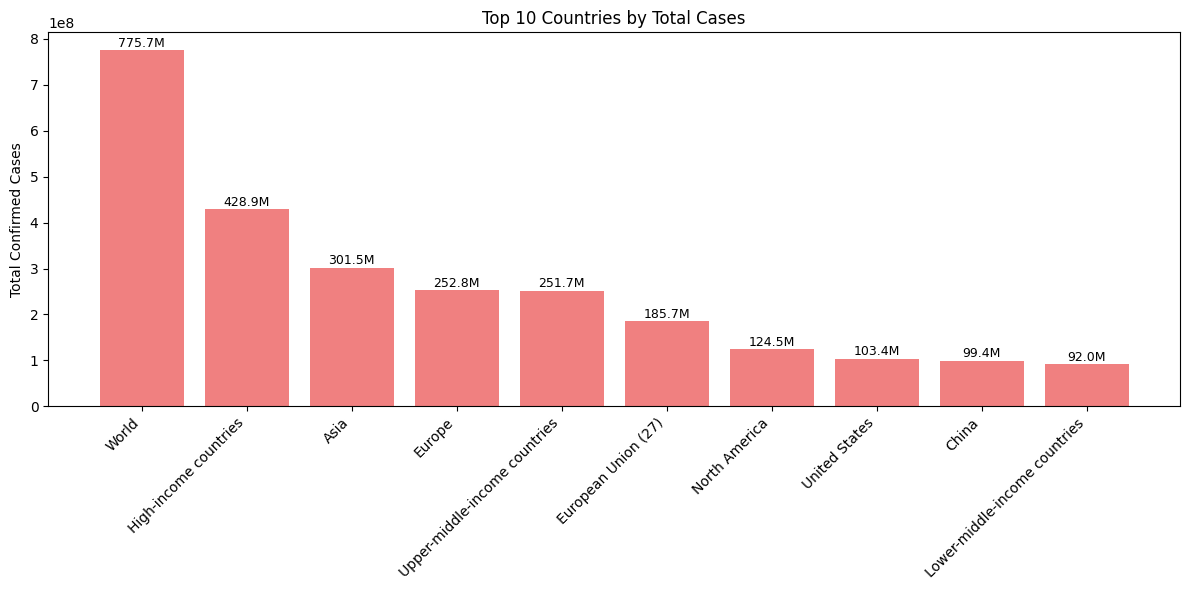

Top 5 countries by total cases:
World: 775,711,519 cases
High-income countries: 428,932,240 cases
Asia: 301,483,129 cases
Europe: 252,791,989 cases
Upper-middle-income countries: 251,711,913 cases

Analysis 3: Regional Patterns


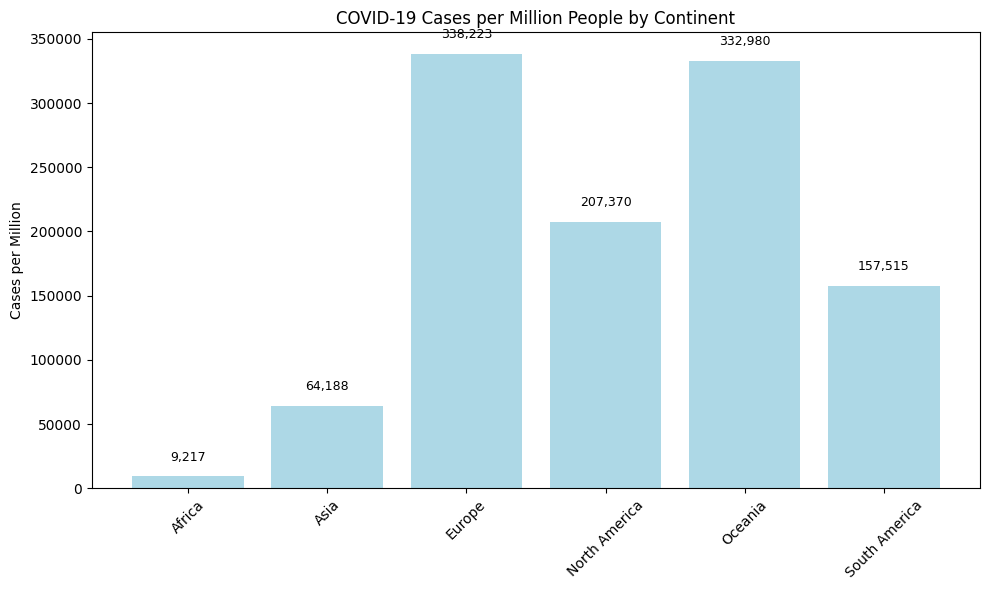


Cases per million by continent:
Africa: 9,217 per million
Asia: 64,188 per million
Europe: 338,223 per million
North America: 207,370 per million
Oceania: 332,980 per million
South America: 157,515 per million

Analysis 4: Country Trajectories


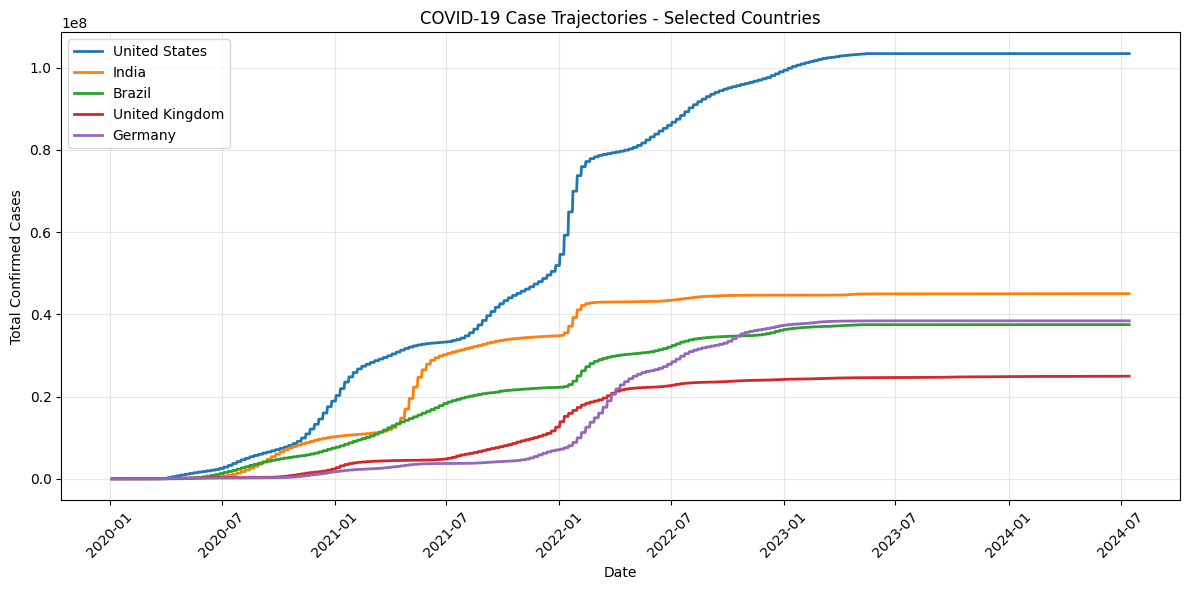


Analysis 5: Mortality Rates


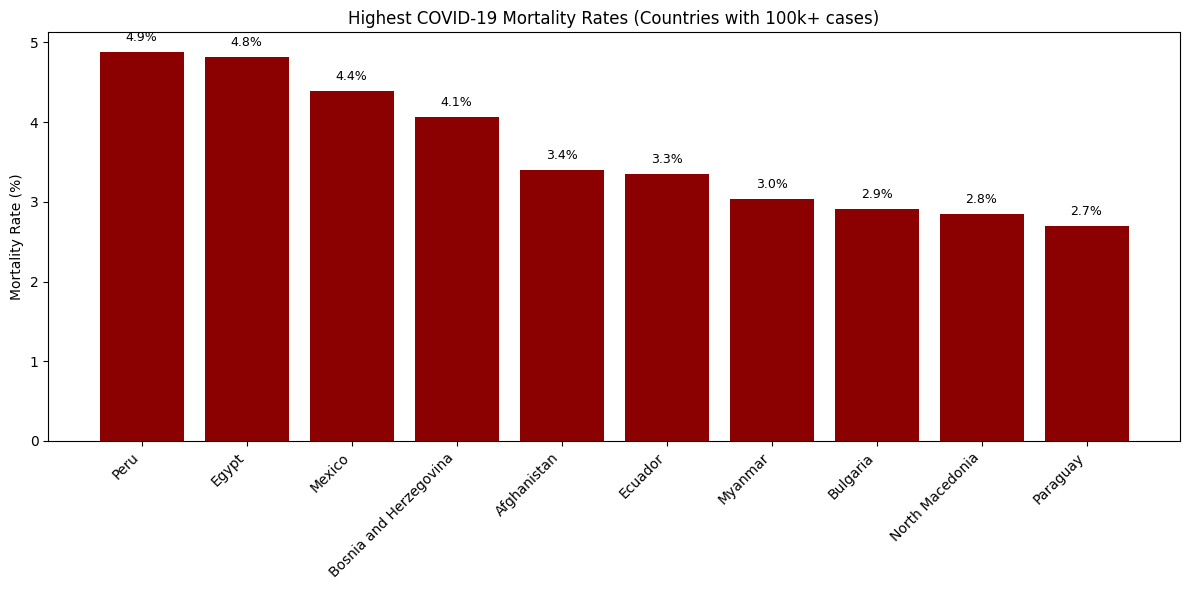

Countries with highest mortality rates:
Peru: 4.9%
Egypt: 4.8%
Mexico: 4.4%
Bosnia and Herzegovina: 4.1%
Afghanistan: 3.4%

Key Insights and Conclusions

Main Findings:
- Global cases show distinct waves and patterns over time
- Certain countries were disproportionately affected
- Clear regional differences in case rates and mortality
- Countries followed different trajectories in their pandemic response

Public Health Insights:
1. Importance of early intervention and containment measures
2. Need for global cooperation in pandemic response
3. Value of data tracking and analysis for public health planning
4. Regional differences highlight need for tailored approaches

Data Notes:
- Case counts depend on testing capacity and reporting standards
- Mortality rates should be interpreted with caution due to testing variations
- Data represents confirmed cases, not total infections

Analysis complete! Analyzed data from 255 countries and regions.
Time period covered: 2020-01-01 to 2024-07-15


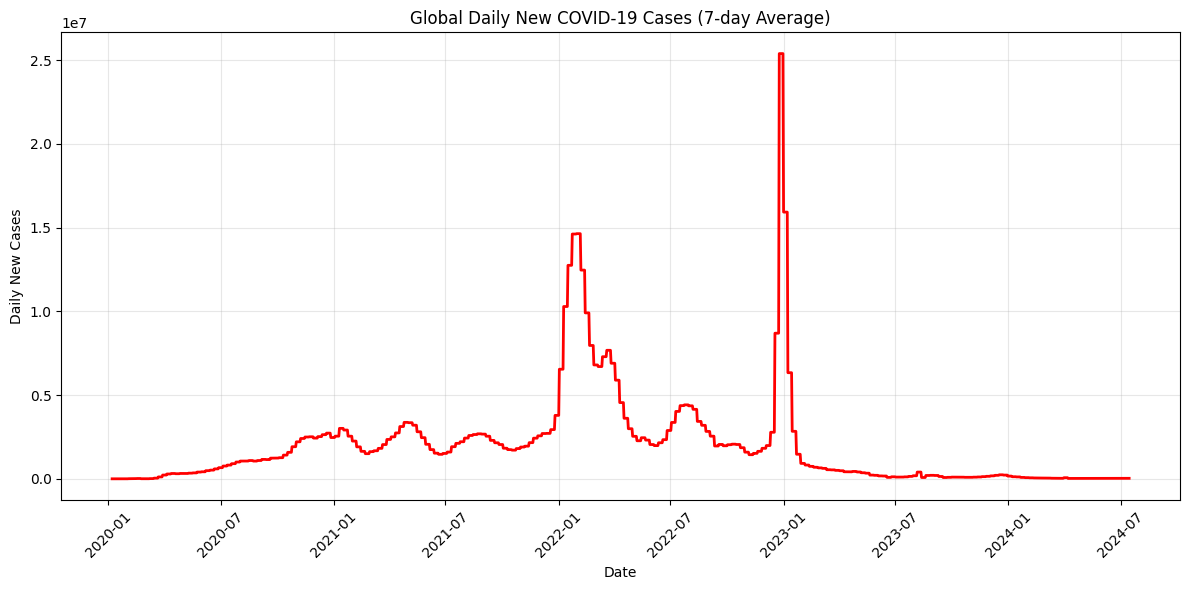

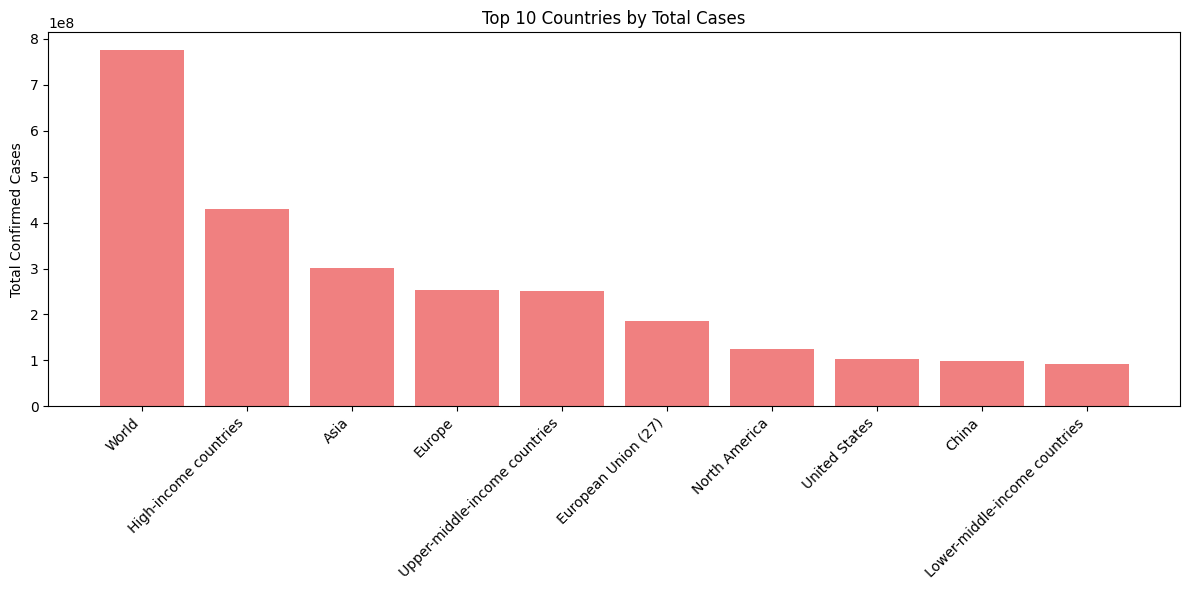

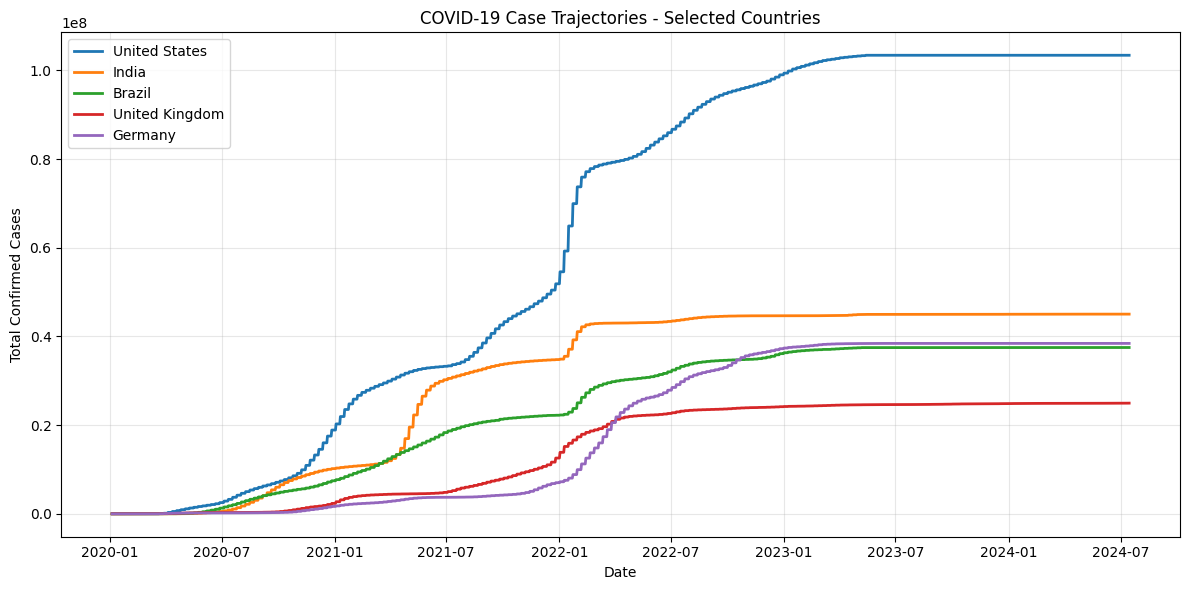

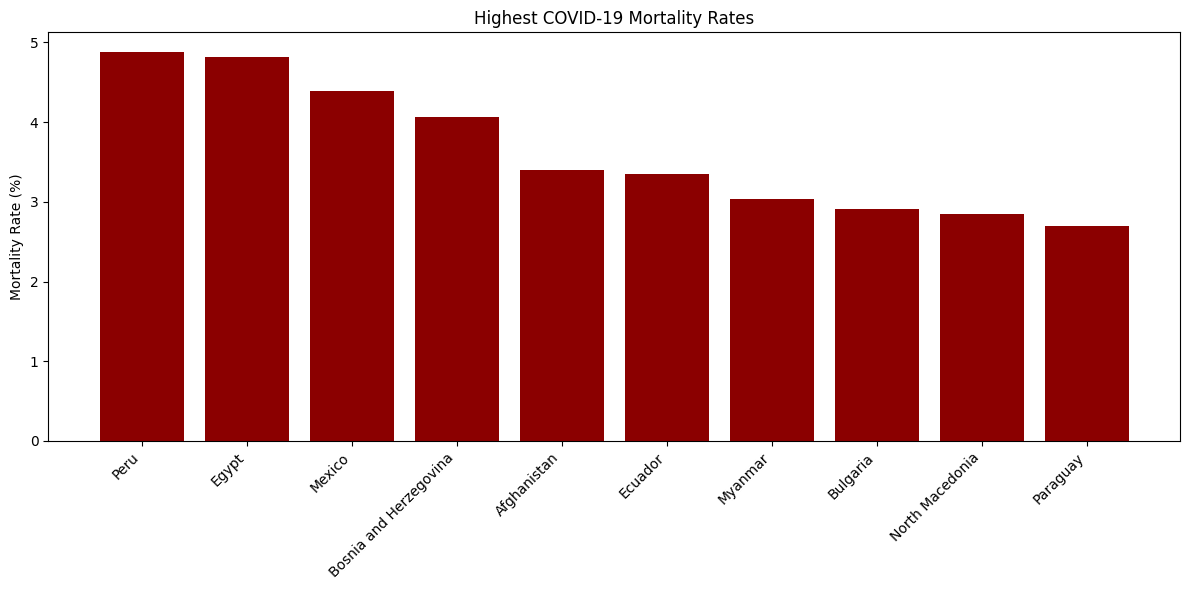

In [1]:
# COVID-19 Data Analysis
# Global Pandemic Trends and Patterns

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

print("Starting COVID-19 Data Analysis...")

# Load the data
print("Downloading COVID-19 dataset...")
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
df = pd.read_csv(url)

print("Dataset loaded successfully")
print(f"Data shape: {df.shape}")

# Quick look at the data
print("\nFirst few rows:")
print(df.head())

print("\nColumns:")
print(df.columns.tolist()[:15])  # Show first 15 columns

# Data cleaning and preparation
print("\nPreparing the data...")

# Make a copy and basic cleaning
covid_data = df.copy()

# Convert date column to datetime
covid_data['date'] = pd.to_datetime(covid_data['date'])

# Filter to most recent complete data (avoid partial current month)
latest_date = covid_data['date'].max()
analysis_date = latest_date - timedelta(days=30)  # Use data up to 30 days ago
covid_data = covid_data[covid_data['date'] <= analysis_date]

print(f"Final dataset: {len(covid_data):,} records")
print(f"Time period: {covid_data['date'].min().date()} to {covid_data['date'].max().date()}")
print(f"Number of countries: {covid_data['location'].nunique()}")

# Analysis 1: Global cases over time
print("\nAnalysis 1: Global Trends")

# Global daily new cases
global_daily = covid_data.groupby('date').agg({
    'new_cases': 'sum',
    'new_deaths': 'sum',
    'total_cases': 'sum',
    'total_deaths': 'sum'
}).reset_index()

# Calculate 7-day moving averages
global_daily['new_cases_7day_avg'] = global_daily['new_cases'].rolling(window=7).mean()
global_daily['new_deaths_7day_avg'] = global_daily['new_deaths'].rolling(window=7).mean()

plt.figure(figsize=(14, 8))

# Plot new cases
plt.subplot(2, 1, 1)
plt.plot(global_daily['date'], global_daily['new_cases_7day_avg'],
         linewidth=2, color='red', alpha=0.7)
plt.title('Global Daily New COVID-19 Cases (7-day Average)')
plt.ylabel('Daily New Cases')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Plot new deaths
plt.subplot(2, 1, 2)
plt.plot(global_daily['date'], global_daily['new_deaths_7day_avg'],
         linewidth=2, color='purple', alpha=0.7)
plt.title('Global Daily New Deaths (7-day Average)')
plt.ylabel('Daily New Deaths')
plt.xlabel('Date')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

total_cases = global_daily['total_cases'].max()
total_deaths = global_daily['total_deaths'].max()
print(f"Total global cases: {total_cases:,.0f}")
print(f"Total global deaths: {total_deaths:,.0f}")

# Analysis 2: Country comparison
print("\nAnalysis 2: Country Comparison")

# Get latest data for each country
latest_data = covid_data[covid_data['date'] == covid_data['date'].max()]
top_countries_cases = latest_data.nlargest(10, 'total_cases')

plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(top_countries_cases)), top_countries_cases['total_cases'], color='lightcoral')
plt.xticks(range(len(top_countries_cases)), top_countries_cases['location'], rotation=45, ha='right')
plt.title('Top 10 Countries by Total Cases')
plt.ylabel('Total Confirmed Cases')

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1000000,
            f'{height/1000000:.1f}M', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("Top 5 countries by total cases:")
for i, row in top_countries_cases.head().iterrows():
    print(f"{row['location']}: {row['total_cases']:,.0f} cases")

# Analysis 3: Regional analysis
print("\nAnalysis 3: Regional Patterns")

# Use continent data for regional analysis
if 'continent' in covid_data.columns:
    continent_data = latest_data.groupby('continent').agg({
        'total_cases': 'sum',
        'total_deaths': 'sum',
        'population': 'sum'
    }).reset_index()

    # Calculate cases per million
    continent_data['cases_per_million'] = (continent_data['total_cases'] / continent_data['population']) * 1000000

    plt.figure(figsize=(10, 6))
    bars = plt.bar(continent_data['continent'], continent_data['cases_per_million'], color='lightblue')
    plt.title('COVID-19 Cases per Million People by Continent')
    plt.ylabel('Cases per Million')
    plt.xticks(rotation=45)

    # Add value labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 10000,
                f'{height:,.0f}', ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()

    print("\nCases per million by continent:")
    for _, row in continent_data.iterrows():
        print(f"{row['continent']}: {row['cases_per_million']:,.0f} per million")

# Analysis 4: Country trajectories comparison
print("\nAnalysis 4: Country Trajectories")

# Select a few key countries for comparison
key_countries = ['United States', 'India', 'Brazil', 'United Kingdom', 'Germany']
country_data = covid_data[covid_data['location'].isin(key_countries)]

plt.figure(figsize=(12, 6))
for country in key_countries:
    country_traj = country_data[country_data['location'] == country]
    plt.plot(country_traj['date'], country_traj['total_cases'], label=country, linewidth=2)

plt.title('COVID-19 Case Trajectories - Selected Countries')
plt.xlabel('Date')
plt.ylabel('Total Confirmed Cases')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analysis 5: Mortality rate analysis
print("\nAnalysis 5: Mortality Rates")

# Calculate mortality rate for countries with significant cases
mortality_data = latest_data[latest_data['total_cases'] > 100000].copy()
mortality_data['mortality_rate'] = (mortality_data['total_deaths'] / mortality_data['total_cases']) * 100

top_mortality = mortality_data.nlargest(10, 'mortality_rate')

plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(top_mortality)), top_mortality['mortality_rate'], color='darkred')
plt.xticks(range(len(top_mortality)), top_mortality['location'], rotation=45, ha='right')
plt.title('Highest COVID-19 Mortality Rates (Countries with 100k+ cases)')
plt.ylabel('Mortality Rate (%)')

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("Countries with highest mortality rates:")
for i, row in top_mortality.head().iterrows():
    print(f"{row['location']}: {row['mortality_rate']:.1f}%")

# Key insights and conclusions
print("\n" + "="*50)
print("Key Insights and Conclusions")
print("="*50)

print("\nMain Findings:")
print("- Global cases show distinct waves and patterns over time")
print("- Certain countries were disproportionately affected")
print("- Clear regional differences in case rates and mortality")
print("- Countries followed different trajectories in their pandemic response")

print("\nPublic Health Insights:")
print("1. Importance of early intervention and containment measures")
print("2. Need for global cooperation in pandemic response")
print("3. Value of data tracking and analysis for public health planning")
print("4. Regional differences highlight need for tailored approaches")

print("\nData Notes:")
print("- Case counts depend on testing capacity and reporting standards")
print("- Mortality rates should be interpreted with caution due to testing variations")
print("- Data represents confirmed cases, not total infections")

print(f"\nAnalysis complete! Analyzed data from {covid_data['location'].nunique()} countries and regions.")
print(f"Time period covered: {covid_data['date'].min().date()} to {covid_data['date'].max().date()}")

# Save charts for portfolio
print("\nSaving charts for portfolio...")

plt.figure(figsize=(12, 6))
plt.plot(global_daily['date'], global_daily['new_cases_7day_avg'], linewidth=2, color='red')
plt.title('Global Daily New COVID-19 Cases (7-day Average)')
plt.ylabel('Daily New Cases')
plt.xlabel('Date')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('global_cases_trend.png', dpi=300, bbox_inches='tight')

plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(top_countries_cases)), top_countries_cases['total_cases'], color='lightcoral')
plt.xticks(range(len(top_countries_cases)), top_countries_cases['location'], rotation=45, ha='right')
plt.title('Top 10 Countries by Total Cases')
plt.ylabel('Total Confirmed Cases')
plt.tight_layout()
plt.savefig('top_countries_cases.png', dpi=300, bbox_inches='tight')

plt.figure(figsize=(12, 6))
for country in key_countries:
    country_traj = country_data[country_data['location'] == country]
    plt.plot(country_traj['date'], country_traj['total_cases'], label=country, linewidth=2)
plt.title('COVID-19 Case Trajectories - Selected Countries')
plt.xlabel('Date')
plt.ylabel('Total Confirmed Cases')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('country_trajectories.png', dpi=300, bbox_inches='tight')

plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(top_mortality)), top_mortality['mortality_rate'], color='darkred')
plt.xticks(range(len(top_mortality)), top_mortality['location'], rotation=45, ha='right')
plt.title('Highest COVID-19 Mortality Rates')
plt.ylabel('Mortality Rate (%)')
plt.tight_layout()
plt.savefig('mortality_rates.png', dpi=300, bbox_inches='tight')